In [16]:
import dask.bag as db
import dask.dataframe as dd
import pandas as pd
import json
import seaborn as sns

import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
# read the entire file into a python array
with open('Data/yelp_academic_dataset_review.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df_review = pd.read_json(data_json_str)

df_review.head(5)


business_id       date               review_id  stars  \
0  5UmKMjUEUNdYWqANhGckJw 2012-08-01  Ya85v4eqdd6k9Od8HbQjyA      4   
1  5UmKMjUEUNdYWqANhGckJw 2014-02-13  KPvLNJ21_4wbYNctrOwWdQ      5   
2  5UmKMjUEUNdYWqANhGckJw 2015-10-31  fFSoGV46Yxuwbr3fHNuZig      5   
3  UsFtqoBl7naz8AVUBZMjQQ 2013-11-08  Di3exaUCFNw1V4kSNW5pgA      5   
4  UsFtqoBl7naz8AVUBZMjQQ 2014-03-29  0Lua2-PbqEQMjD9r89-asw      3   

                                                text    type  \
0  Mr Hoagie is an institution. Walking in, it do...  review   
1  Excellent food. Superb customer service. I mis...  review   
2  Yes this place is a little out dated and not o...  review   
3  All the food is great here. But the best thing...  review   
4  We checked this place out this past Monday for...  review   

                  user_id                                 votes  
0  PUFPaY9KxDAcGqfsorJp3Q  {'cool': 0, 'funny': 0, 'useful': 0}  
1  Iu6AxdBYGR4A0wspR9BYHA  {'cool': 0, 'funny': 0, 'useful': 0}  
2  auESFwWvW42h6alXgFxAXQ  {'cool': 0, 'funny': 0, 'useful': 0}  
3  uK8tzraOp4M5u3uYrqIBXg  {'cool': 0, 'funny': 0, 'useful': 0}  
4  I_47G-R2_egp7ME5u_ltew  {'cool': 0, 'funny': 0, 'useful': 0}

In [11]:
# read the entire file into a python array
with open('Data/yelp_academic_dataset_tip.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df_tip = pd.read_json(data_json_str)

df_tip.head(5)

business_id       date  likes  \
0  cE27W9VPgO88Qxe4ol6y_g 2013-04-18      0   
1  mVHrayjG3uZ_RLHkLj-AMg 2013-01-06      1   
2  KayYbHCt-RkbGcPdGOThNg 2013-12-03      0   
3  KayYbHCt-RkbGcPdGOThNg 2015-07-08      0   
4  1_lU0-eSWJCRvNGk78Zh9Q 2015-10-25      0   

                                                text type  \
0                             Don't waste your time.  tip   
1  Your GPS will not allow you to find this place...  tip   
2                              Great drink specials!  tip   
3  Friendly staff, good food, great beer selectio...  tip   
4                             Beautiful restoration.  tip   

                  user_id  
0  -6rEfobYjMxpUWLNxszaxQ  
1  EZ0r9dKKtEGVx2CdnowPCw  
2  xb6zEQCw9I-Gl0g06e1KsQ  
3  QawZN4PSW7ng_9SP7pjsVQ  
4  MLQre1nvUtW-RqMTc4iC9A

In [24]:
import re
from collections import defaultdict

Months = {
     1:"January",
     2:"February",
     3:"March",
     4:"April",
     5:"May",
     6:"June",
     7:"July",
     8:"August",
     9:"September",
    10:"October",
    11:"November",
    12:"December"
}
#[^a-zA-Z0-9 \t\n\r\v\f] Non-alphanumeric or whitespace.
wcounts = {}
wcounts["TOTAL"] = defaultdict(int)
WordsInMonth = defaultdict(int)

for i in range(1,13):
    wcounts[Months[i]] = defaultdict(int)
    numReviews = 0
    numTips = 0
    for review in df_review.loc[df_review['date'].dt.month == i].text.values:
        numReviews += 1
        for word in re.sub("[^a-zA-Z0-9 \t\n\r\v\f]","",review).split():
            wcounts[Months[i]][word.lower()] += 1
            wcounts["TOTAL"][word.lower()] += 1
            WordsInMonth[Months[i]] += 1
    for tip in df_tip.loc[df_tip['date'].dt.month == i].text.values:
        numTips += 1
        for word in re.sub("[^a-zA-Z0-9 \t\n\r\v\f]","",review).split():
            wcounts[Months[i]][word.lower()] += 1
            wcounts["TOTAL"][word.lower()] += 1
            WordsInMonth[Months[i]] += 1
    print(Months[i]+": "+str(numReviews)+" Reviews; "+str(numTips)+" Tips; Total Words: "+str(WordsInMonth[Months[i]]))

January: 170941 Reviews; 42452 Tips; Total Words: 23040746
February: 154833 Reviews; 42022 Tips; Total Words: 20522163
March: 181417 Reviews; 52616 Tips; Total Words: 28747548
April: 176704 Reviews; 50831 Tips; Total Words: 22978644
May: 183310 Reviews; 53979 Tips; Total Words: 27768872
June: 190490 Reviews; 54312 Tips; Total Words: 27421607
July: 213509 Reviews; 59522 Tips; Total Words: 30456614
August: 216273 Reviews; 58809 Tips; Total Words: 42272514
September: 189777 Reviews; 45635 Tips; Total Words: 41627679
October: 191808 Reviews; 44968 Tips; Total Words: 35309990
November: 183120 Reviews; 42916 Tips; Total Words: 29471473
December: 173031 Reviews; 43802 Tips; Total Words: 25729491


Usage Statistics for pizza:
Total Uses: 177866.4722223407
January: 18277.0 uses, 10.3%
February: 17564.0 uses, 9.9%
March: 14424.0 uses, 8.1%
April: 17315.0 uses, 9.7%
May: 14504.0 uses, 8.2%
June: 15653.0 uses, 8.8%
July: 15874.0 uses, 8.9%
August: 11571.0 uses, 6.5%
September: 10529.0 uses, 5.9%
October: 12219.0 uses, 6.9%
November: 14618.0 uses, 8.2%
December: 15319.0 uses, 8.6%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


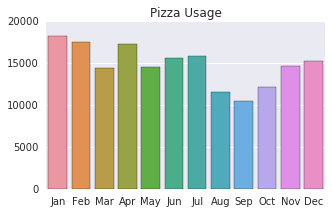

In [92]:

import operator

def getMonthlyUsages(word, MonthlyDict, MonthlyWordCounts):
    monthlyUses = []
    for m in Months:
        if(word in MonthlyDict[Months[m]].keys()):
            monthlyUses.append(MonthlyDict[Months[m]][word]*(MonthlyWordCounts["January"]/MonthlyWordCounts[Months[m]]))        
        else:
            monthlyUses.append(0);
    return monthlyUses

def printUsageStats(word, MonthlyUsage):
    print("Usage Statistics for "+word+":")
    TotalUses = sum(MonthlyUsage)
    print("Total Uses:", TotalUses)
    for m in Months:
        usagePercent = round(100*MonthlyUsage[m-1]/TotalUses,1)
        print(Months[m]+": "+str(round(MonthlyUsage[m-1],0))+" uses, "+str(usagePercent)+"%")


#Calculates a words frequency range between its highest usage month, and its lowest usage month:
#For example, if a word is used the exact same number of times in all 12 months (each month's frequency is 8.5%), this will return 0,
#however if a word is used 2x more in one month than another, the value returned would be the percentage gap between those two months.
def frequencyMaxandMin(word, MonthlyDict, MonthlyWordCounts):
        TotalUses = MonthlyDict["TOTAL"][word]
        monthlyUses = []
        for m in Months:
            if(word in MonthlyDict[Months[m]].keys()):
                monthlyUses.append(MonthlyDict[Months[m]][word]*(MonthlyWordCounts["January"]/MonthlyWordCounts[Months[m]]))        
            else:
                monthlyUses.append(0)
        return (100*max(monthlyUses))/TotalUses,(100*min(monthlyUses))/TotalUses
    
#sorted_word_counts = sorted(wcounts["TOTAL"].items(),key=operator.itemgetter(1))
#sorted_word_counts.reverse()
#TopWords = [x[0] for x in sorted_word_counts[:500]]

shortMonths =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

rcParams['figure.figsize'] = 5,3 
PizzaUsage = getMonthlyUsages("pizza", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,PizzaUsage)
ax.set_title("Pizza Usage")
printUsageStats("pizza", PizzaUsage)


Usage Statistics for anthropomorphizing:
Total Uses: 50519.42628569636
January: 0 uses, 0.0%
February: 0 uses, 0.0%
March: 0 uses, 0.0%
April: 0 uses, 0.0%
May: 0 uses, 0.0%
June: 0 uses, 0.0%
July: 1.0 uses, 0.0%
August: 0 uses, 0.0%
September: 50519.0 uses, 100.0%
October: 0 uses, 0.0%
November: 0 uses, 0.0%
December: 0 uses, 0.0%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


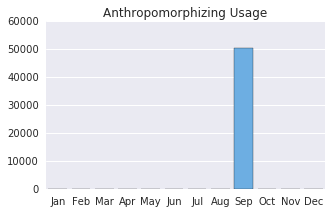

In [80]:
rcParams['figure.figsize'] = 5,3 
anthroUsage = getMonthlyUsages("anthropomorphizing", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,anthroUsage)
ax.set_title("Anthropomorphizing Usage")
printUsageStats("anthropomorphizing", anthroUsage)

Usage Statistics for manicure:
Total Uses: 109066.49835283712
January: 594.0 uses, 0.5%
February: 685.0 uses, 0.6%
March: 583.0 uses, 0.5%
April: 102759.0 uses, 94.2%
May: 717.0 uses, 0.7%
June: 697.0 uses, 0.6%
July: 615.0 uses, 0.6%
August: 432.0 uses, 0.4%
September: 392.0 uses, 0.4%
October: 517.0 uses, 0.5%
November: 485.0 uses, 0.4%
December: 591.0 uses, 0.5%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


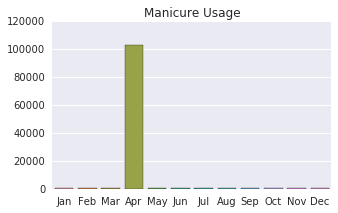

In [81]:
rcParams['figure.figsize'] = 5,3 
manicureUsage = getMonthlyUsages("manicure", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,manicureUsage)
ax.set_title("Manicure Usage")
printUsageStats("manicure", manicureUsage)

Usage Statistics for alcohol:
Total Uses: 52414.82440561975
January: 1345.0 uses, 2.6%
February: 1332.0 uses, 2.5%
March: 1109.0 uses, 2.1%
April: 1325.0 uses, 2.5%
May: 1079.0 uses, 2.1%
June: 1280.0 uses, 2.4%
July: 1272.0 uses, 2.4%
August: 870.0 uses, 1.7%
September: 737.0 uses, 1.4%
October: 828.0 uses, 1.6%
November: 971.0 uses, 1.9%
December: 40268.0 uses, 76.8%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


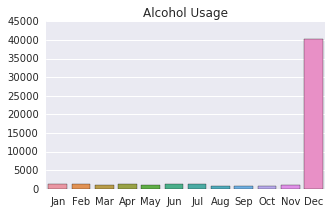

In [82]:
rcParams['figure.figsize'] = 5,3 
alcoholUsage = getMonthlyUsages("alcohol", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,alcoholUsage)
ax.set_title("Alcohol Usage")
printUsageStats("alcohol", alcoholUsage)

Usage Statistics for Drunk:
Total Uses: 11980.504840644575
January: 1247.0 uses, 10.4%
February: 1204.0 uses, 10.0%
March: 984.0 uses, 8.2%
April: 1312.0 uses, 10.9%
May: 1045.0 uses, 8.7%
June: 1128.0 uses, 9.4%
July: 1085.0 uses, 9.1%
August: 796.0 uses, 6.6%
September: 715.0 uses, 6.0%
October: 771.0 uses, 6.4%
November: 824.0 uses, 6.9%
December: 870.0 uses, 7.3%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


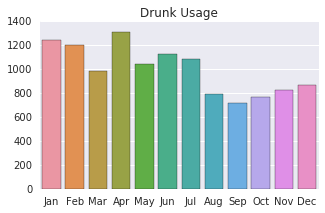

In [83]:
rcParams['figure.figsize'] = 5,3 
drunkUsage = getMonthlyUsages("drunk", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths, drunkUsage)
ax.set_title("Drunk Usage")
printUsageStats("Drunk", drunkUsage)

Usage Statistics for sushi:
Total Uses: 105381.87675735887
January: 11264.0 uses, 10.7%
February: 11014.0 uses, 10.5%
March: 9003.0 uses, 8.5%
April: 10578.0 uses, 10.0%
May: 8774.0 uses, 8.3%
June: 9238.0 uses, 8.8%
July: 9152.0 uses, 8.7%
August: 6682.0 uses, 6.3%
September: 6024.0 uses, 5.7%
October: 6761.0 uses, 6.4%
November: 7895.0 uses, 7.5%
December: 8995.0 uses, 8.5%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


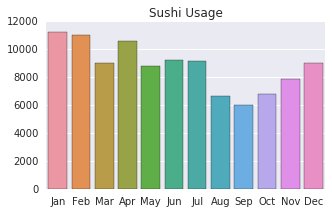

In [84]:
rcParams['figure.figsize'] = 5,3 
sushiUsage = getMonthlyUsages("sushi", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,sushiUsage)
ax.set_title("Sushi Usage")
printUsageStats("sushi", sushiUsage)

In [95]:
import copy

wcounts2 = copy.deepcopy(wcounts)

#FILTER WORDS FOR THE WORD CLOUDS!
allwords = list(wcounts2["TOTAL"].keys())
for word in allwords:
    maxF,minF = frequencyMaxandMin(word, wcounts2, WordsInMonth)
    if(((maxF - minF)<50) or (wcounts2["TOTAL"][word] < 1000) or (minF < 1)):
        for month in wcounts2:
            wcounts2[month].pop(word, None)
        


TypeError: 'float' object is not callable

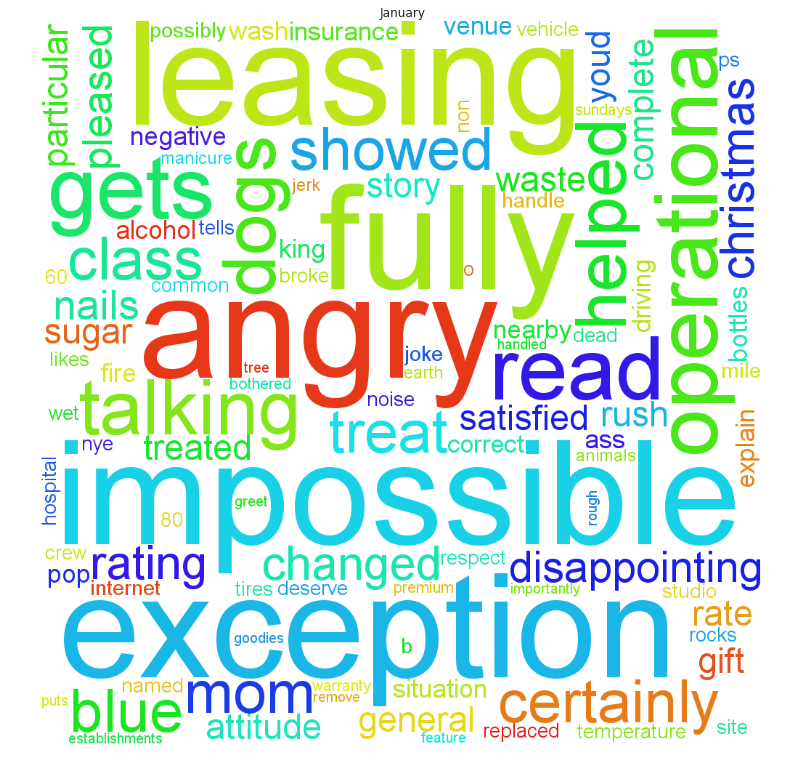

In [65]:
from os import path
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 13, 13 
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["January"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("January")

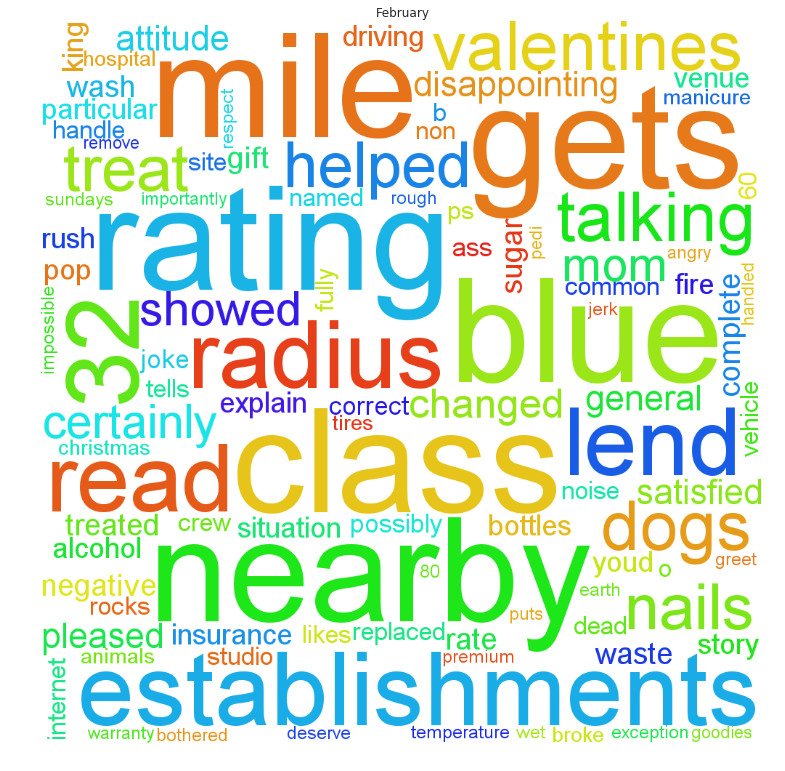

In [66]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["February"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("February")

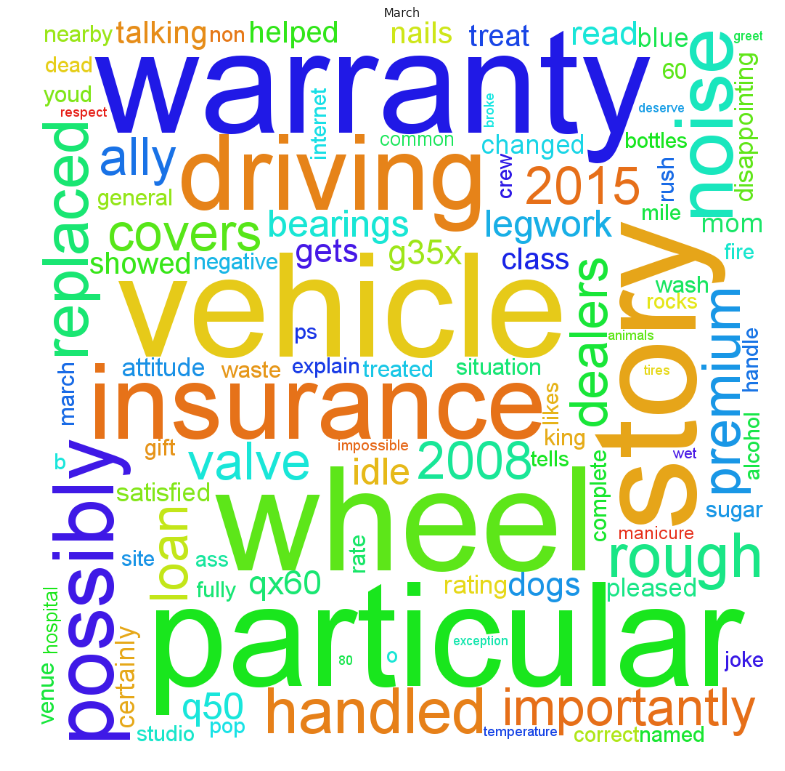

In [67]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["March"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("March")

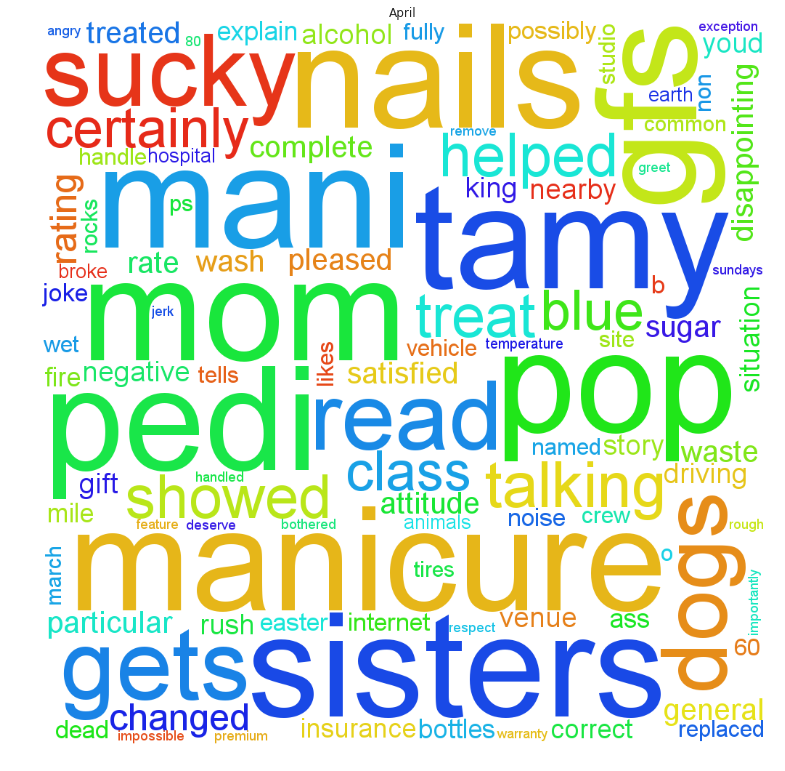

In [68]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["April"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("April")

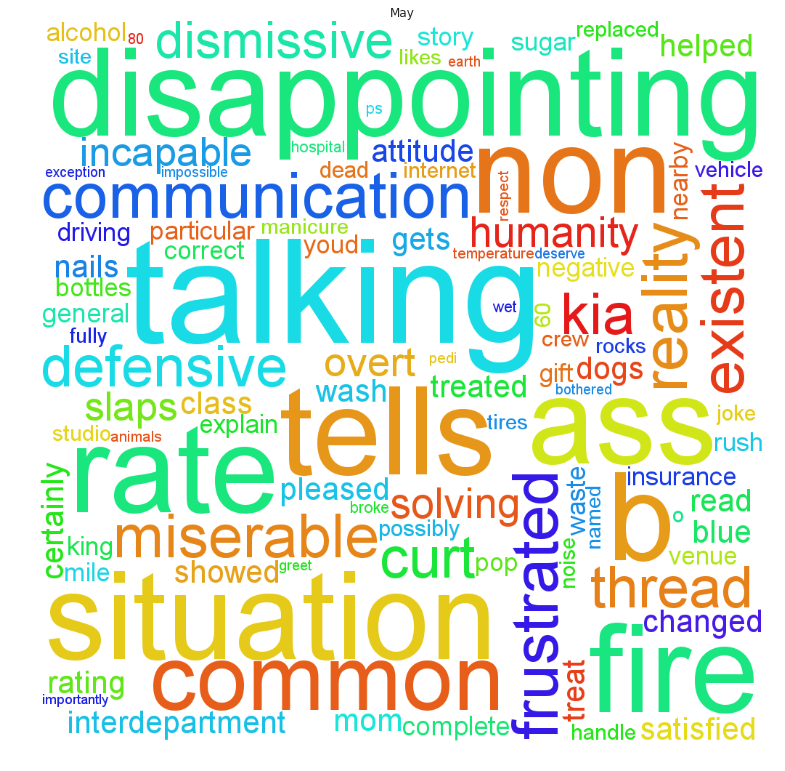

In [69]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["May"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("May")

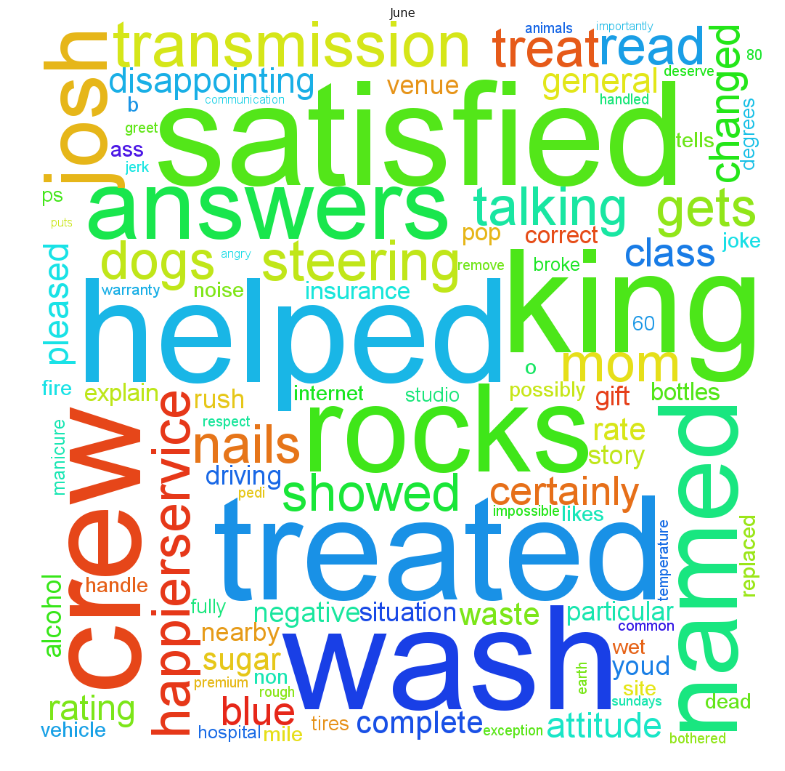

In [70]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["June"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("June")

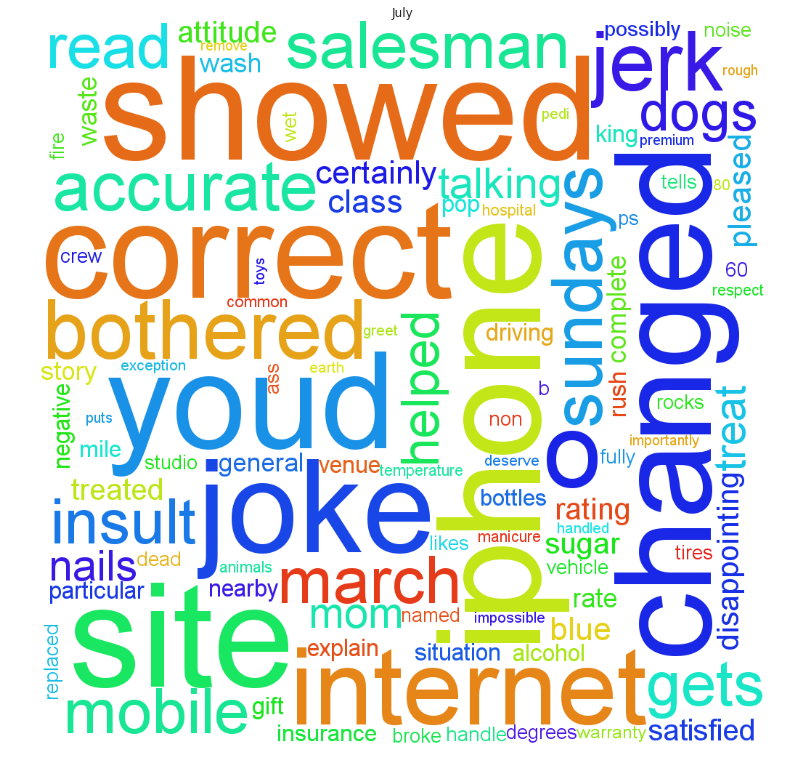

In [71]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["July"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("July")

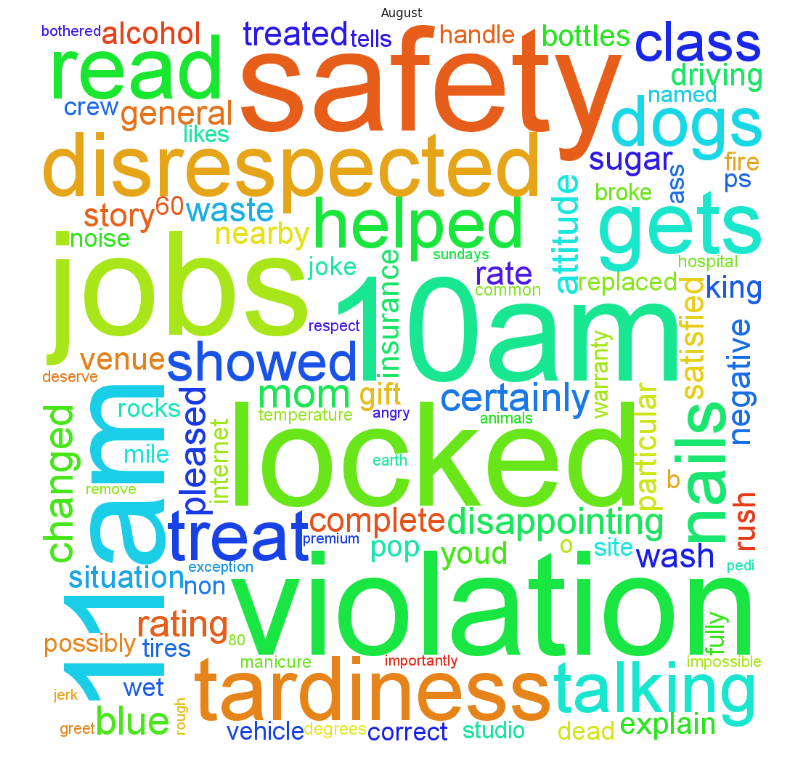

In [72]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["August"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("August")

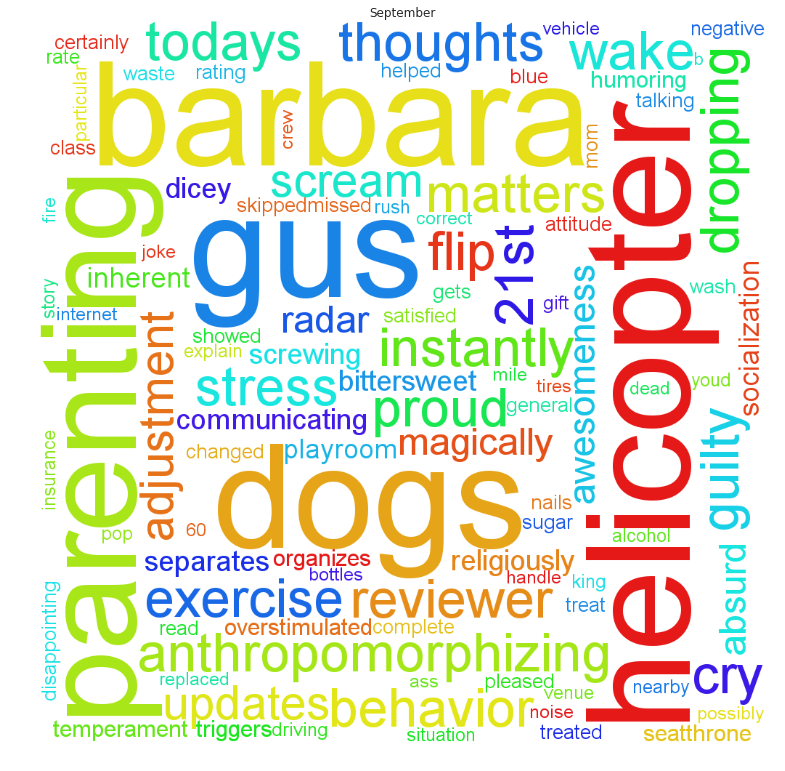

In [73]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["September"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("September")

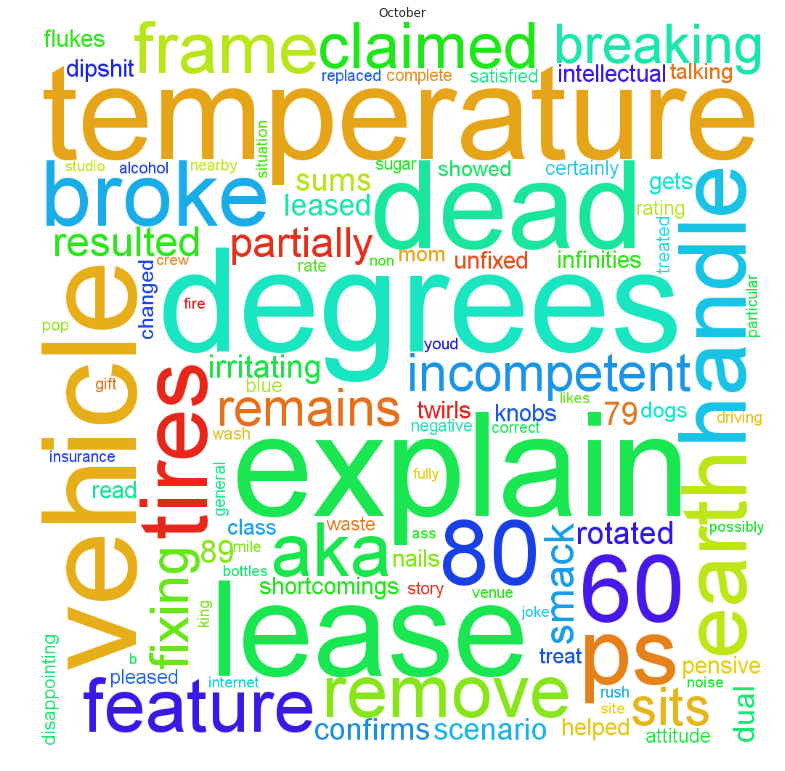

In [74]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["October"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("October")

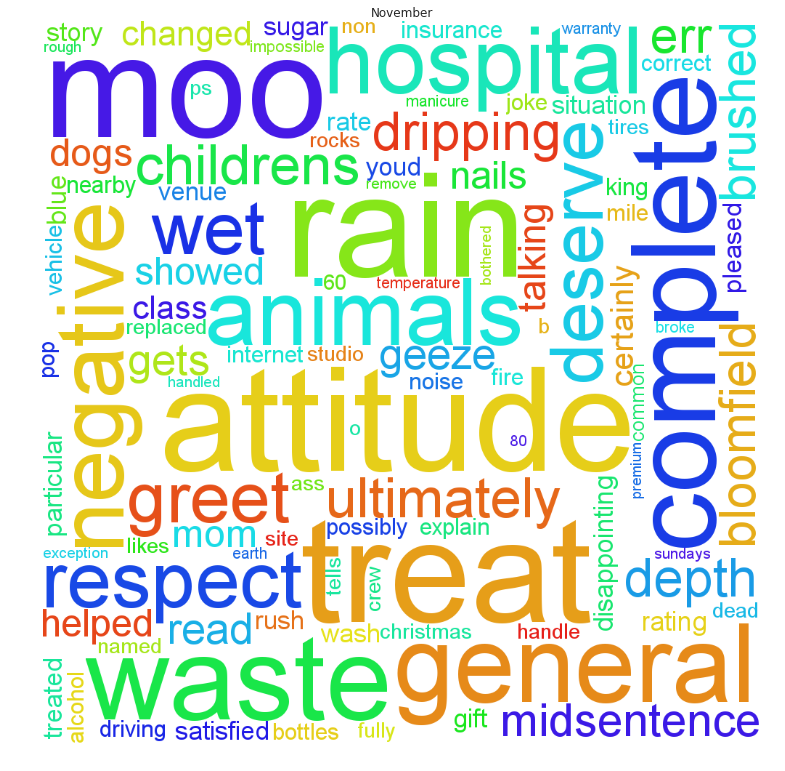

In [75]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["November"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("November")

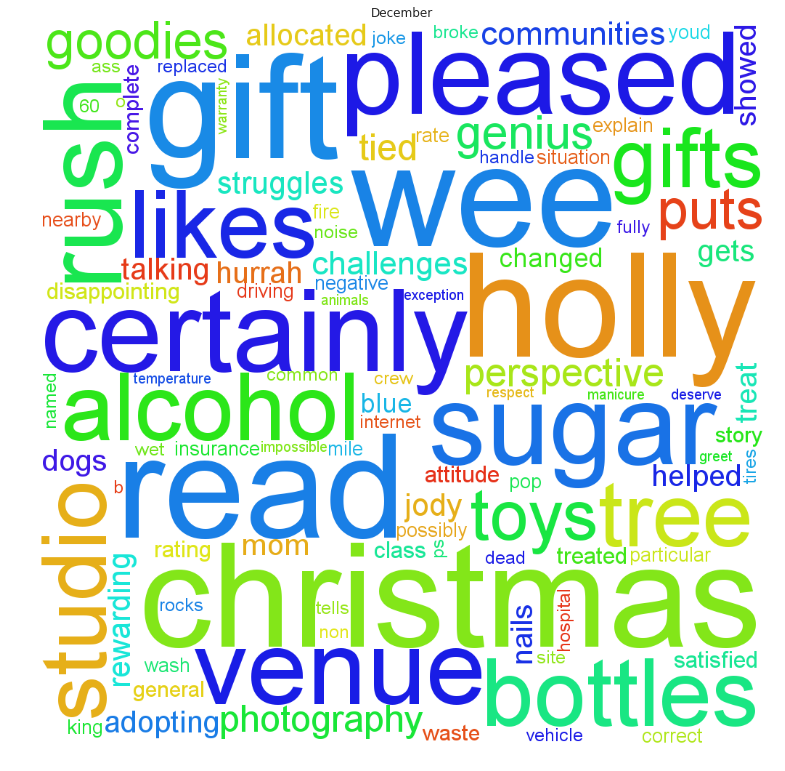

In [76]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["December"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("December")